# PHONE SALES DATA ANALYSIS
## Project Overview
This project involved a comprehensive analysis of a phone sales dataset to extract insights.

### 1. Initialization:
- **Imported necessary libraries** to facilitate data manipulation and visualization.
- Loaded the phone sales dataset from a CSV file located on my local machine.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Libraries had been installed earlier

print("Libraries imported and now are ready to use.")

Libraries imported and now are ready to use.


In [2]:
# Defining the file path
file_path = r'C:\Users\Patricia\Documents\phone_sales.csv'

# Loading the dataset
df = pd.read_csv(file_path)

# Inspecting the first few rows
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


### 2. Data Inspection:
- **Structure Examination**: Checked the dataset's structure to understand its composition.
- **Row and Column Count**: Determined the number of rows and columns to grasp the dataset's scale.
- **Missing Values Overview**: Analyzed the dataset for missing values to assess data integrity.

In [3]:
# Number of rows and columns
rows, columns = df.shape
print(f'The dataset contains {rows} rows and {columns} columns.')

The dataset contains 3114 rows and 12 columns.


In [4]:
# Data types of each column
df.dtypes

Brands                  object
Models                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
Mobile                  object
Discount                 int64
discount percentage    float64
dtype: object

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


### 3. Data Cleaning:
- **Handling Missing Values**: Dropped rows with missing values in the Memory and Storage columns, and filled missing values in the Rating column with the median to preserve data continuity.

*Assumption: The dataset is large enough that losing the relatively few Memory and Storage rows won't impact the analysis.*

In [6]:
# Memory values
df.dropna(subset=['Memory'], inplace=True)

#Storage values
df.dropna(subset=['Storage'], inplace=True)

# Rating values
df.fillna({'Rating': df['Rating'].median()}, inplace=True)

In [7]:
# Repeating the check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [8]:
# Statistical summary for numerical columns
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,3032.000000,3032.000000,3032.000000,3032.000000,3032.000000
mean,4.243931,26186.404354,28113.184697,1926.780343,6.128774
std,0.266970,29291.841572,30843.861948,5401.091290,11.192416
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9996.000000,10490.000000,0.000000,0.000000
50%,4.300000,15299.500000,16990.000000,0.000000,0.000000
75%,4.400000,28999.000000,31489.250000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


**Exporting the Cleaned Data:**

In [9]:
# Specifing the directory and filename for the cleaned dataset
cleanedfile_path = 'C:/Users/Patricia/Documents/Cleaned Phones Sales Data.csv'

# Saving it to the specified location
df.to_csv(cleanedfile_path, index=False)

print(f"File saved to: {cleanedfile_path}")

File saved to: C:/Users/Patricia/Documents/Cleaned Phones Sales Data.csv


## ANALYSIS

### 4. Key Performance Indicators (KPIs) Calculation:
Calculated and summarized relevant KPIs, including:
- **Total Revenue Generated**
- **Total Discount Value**
- **Sales Volume by Brand**
- **Top Selling Phone Models**
- **Top Selling Brands**
- **Top Selling Phone Colors**
- **Highest Rated Brands**
- **Distribution of Customer Ratings**

In [10]:
# Calculating the total sales revenue
total_sales_revenue = df['Selling Price'].sum()
print(f'Total Sales Revenue: {total_sales_revenue}')

# Calculating the total discount
total_discount = df['Discount'].sum()
print(f'Total Discount: {total_discount}')

Total Sales Revenue: 79397178
Total Discount: 5841998


**Sales Volume by Brand**

In [11]:
# Calculating the total sales revenue for each brand
total_sales_by_brand = df.groupby('Brands')['Selling Price'].sum().reset_index()

# Renaming the columns for clarity
total_sales_by_brand.columns = ['Brand', 'Total Sales Revenue']

# Sorting the results by total sales revenue in descending order
total_sales_by_brand = total_sales_by_brand.sort_values(by='Total Sales Revenue', ascending=False)

# Displaying the result
print(total_sales_by_brand)

           Brand  Total Sales Revenue
1          Apple             29520613
13       SAMSUNG             17424534
15        realme              4879344
11          OPPO              4825727
14        Xiaomi              3312502
16          vivo              2819444
0           ASUS              2398576
10         Nokia              1998387
7             LG              1912995
3   Google Pixel              1780364
9       Motorola              1717534
6        Infinix              1674919
4            HTC              1557291
12          POCO              1248426
8         Lenovo              1220145
2         GIONEE               920427
5           IQOO               185950


**Top Selling Phone Models**

In [12]:
# Counting the occurrences of each mobile model
top_selling_models = df['Mobile'].value_counts().reset_index()

# Renaming the columns for clarity
top_selling_models.columns = ['Mobile', 'Units Sold']

# Selecting the top 10 most famous mobiles models
top_10_mobiles = top_selling_models.head(10)

# Displaying the result
print(top_10_mobiles)

                    Mobile  Units Sold
0         Apple iPhone 11           36
1         Apple iPhone XR           27
2          Apple iPhone 7           21
3     Apple iPhone 11 Pro           21
4     Apple iPhone 7 Plus           20
5  Apple iPhone 13 Pro Max          19
6      SAMSUNG Galaxy A12           19
7         Apple iPhone 6s           18
8    Apple iPhone 12 Mini           18
9         Apple iPhone 12           18


**Top Selling Brands**

In [13]:
# Grouping by 'Brands' and counting the number of 'Selling Price' entries
units_sold_per_brand = df.groupby('Brands')['Selling Price'].count().reset_index()

# Renaming the columns for clarity
units_sold_per_brand.columns = ['Brands', 'Units Sold']

# Sorting the DataFrame by 'Units Sold' in descending order
top_selling_brands = units_sold_per_brand.sort_values(by='Units Sold', ascending=False).head(5)

top_selling_brands

,Brands,Units Sold
13,SAMSUNG,696
1,Apple,369
15,realme,294
11,OPPO,260
10,Nokia,209


**Top Selling Phone Colors**

In [14]:
# Finding the most sold colors
most_sold_colors = df['Colors'].value_counts().reset_index()
most_sold_colors.columns = ['Color', 'Units Sold']

# Display the top 10 most sold colors
top_selling_colors = most_sold_colors.head(10)
print(top_selling_colors)

            Color  Units Sold
0           Black         462
1            Gold         190
2           White         154
3            Blue         146
4          Silver          99
5             Red          82
6            Grey          44
7      Space Grey          36
8  Midnight Black          35
9       Rose Gold          29


**Highest Rated Brands**

In [15]:
# Calculate the average rating for each brand
average_rating_per_brand = df.groupby('Brands')['Rating'].mean().reset_index()
average_rating_per_brand.columns = ['Brands', 'Average Rating']

# Sorting the DataFrame by 'Units Sold' in descending order
highest_rated_brands = average_rating_per_brand.sort_values(by='Average Rating', ascending=False).head(5)

# Display the result
print(highest_rated_brands)

          Brands  Average Rating
1          Apple        4.533604
3   Google Pixel        4.506897
5           IQOO        4.400000
15        realme        4.388776
16          vivo        4.387603


**Distribution of Customer Ratings**

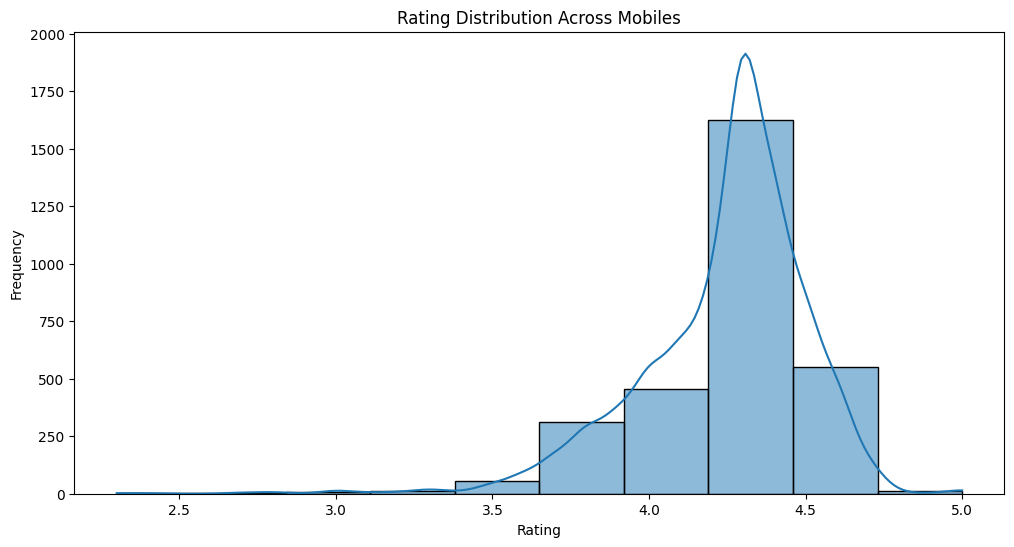

In [16]:
# Plot the distribution of ratings across different models
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Rating Distribution Across Mobiles')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## 5. Data Visualization:
Created visualizations to illustrate key findings:
- Distribution of Selling Prices Across Brands to understand market positioning.
- Average Selling Prices and Count of Phones Sold by Top 10 Phone Colors to analyze the relationship between color popularity and pricing.

**Distribution of Selling Prices Across Brands:**

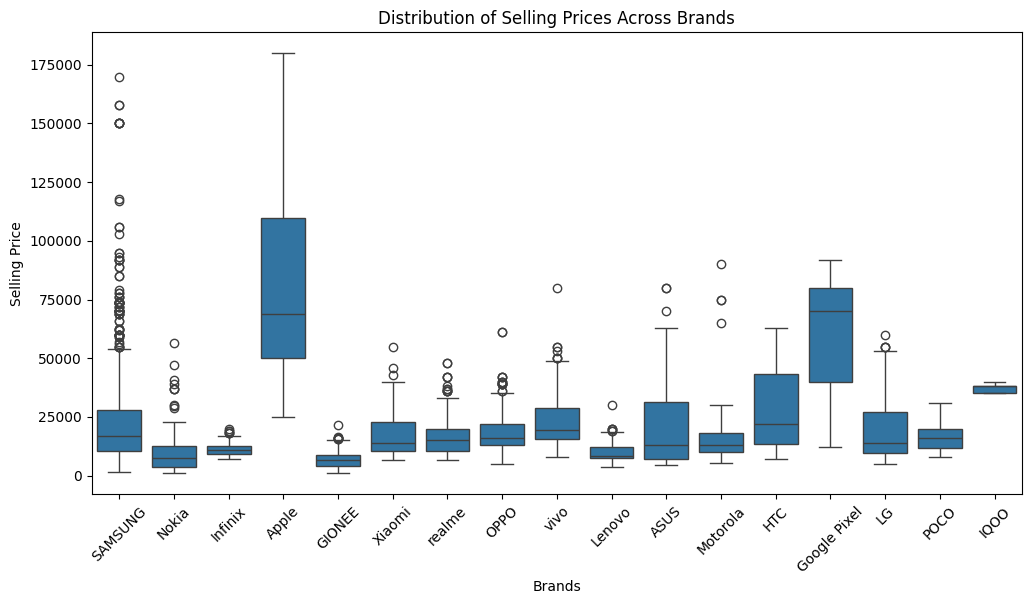

In [17]:
# Creating a boxplot for selling prices by brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brands', y='Selling Price', data=df)
plt.title('Distribution of Selling Prices Across Brands')
plt.xticks(rotation=45)
plt.xlabel('Brands')
plt.ylabel('Selling Price')
plt.show()

This boxplot provides insights into the distribution of selling prices for each brand.

We observe that:
- *The typical price point for each phone brand is between 0 to 75,000*, except for Apple (which goes way beyong 100,000).
- *The brand of Apple clearly stands out, with its wider box indicating a greater price variation within its brand models.*
- *The high number of outliers within th SAMSUNG brand indicates unusually high selling prices for a high number of its models.* This may be highlighting presence of high quality models in the brand.

**Average Selling Prices by Top 10 Phone Colors**

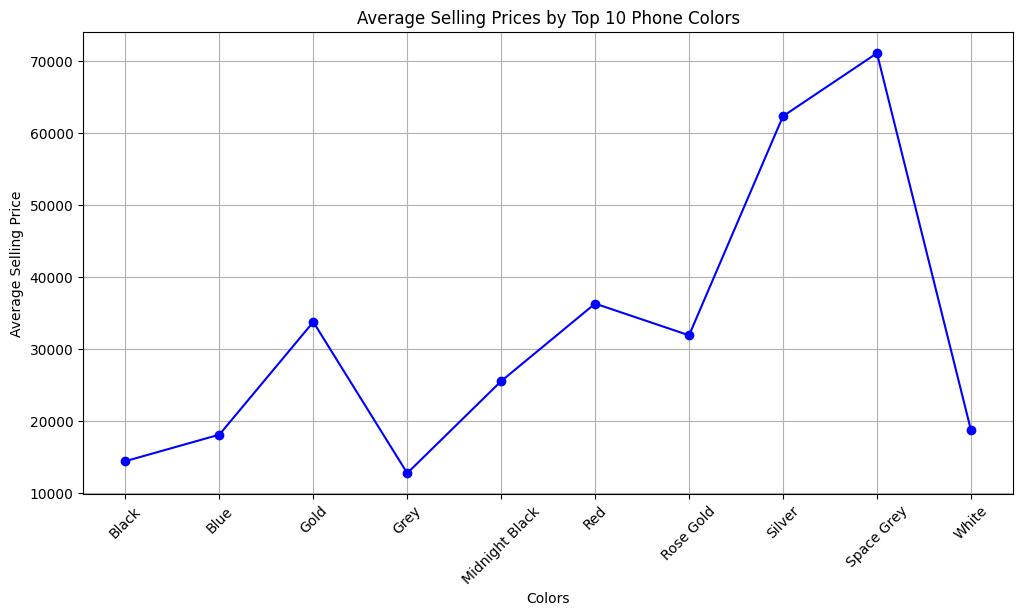

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensuring the top 10 colors are calculated
top_10_colors = df['Colors'].value_counts().head(10).index
df_top_10_colors = df[df['Colors'].isin(top_10_colors)]

# Calculating the average selling price for the top 10 colors
avg_price_by_color = df_top_10_colors.groupby('Colors')['Selling Price'].mean().reset_index()

# Line graph for average selling prices by color
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_color['Colors'], avg_price_by_color['Selling Price'], marker='o', color='b')
plt.title('Average Selling Prices by Top 10 Phone Colors')
plt.xticks(rotation=45)
plt.xlabel('Colors')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

This line graph provides insights into the average selling prices by Top 10 Phone Colors.

We observe that:
- Space Grey and Silver colours have a higher average selling prices, while common colours like black, white and blue actually have lower average selling prices.
- *For the typically popular colours with a very low average sellling price like black, these results may indicate that these phone colours are more mass-produced and hence competitively priced.*
- OR; *the unique colours like Gold, Rose Gold and Red which have significantly higher average selling prices than the common colours, may indicate a possible premium positioning in the market. Hence, brands may use these specific colors to target higher-end consumers.*

**Average Selling Prices and Count of Phones Sold by Top 10 Phone Colors**

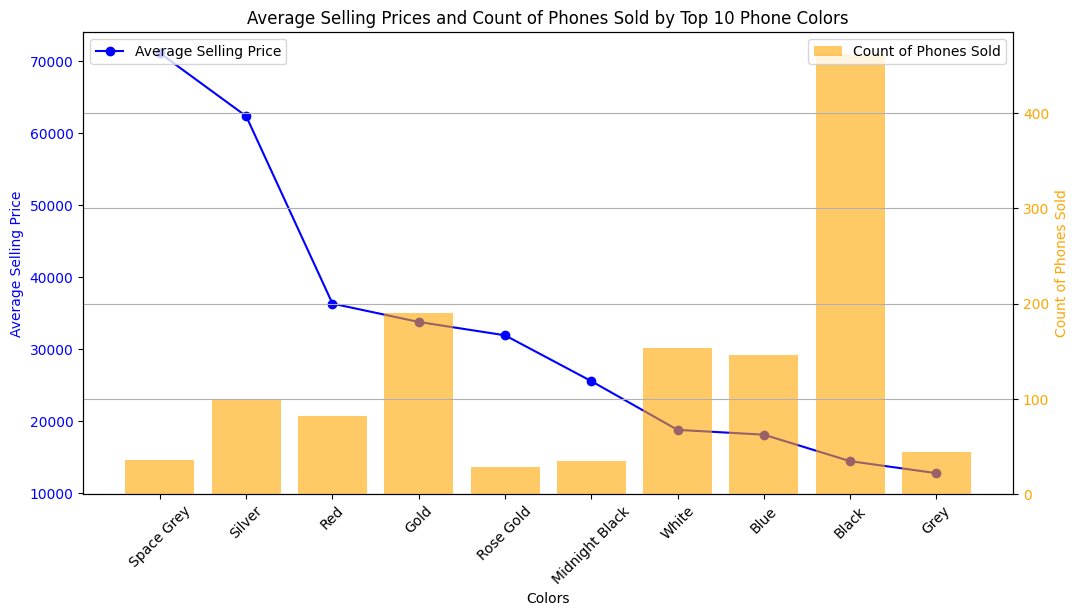

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the top 10 colors are calculated
top_10_colors = df['Colors'].value_counts().head(10).index
df_top_10_colors = df[df['Colors'].isin(top_10_colors)]

# Calculate the average selling price for the top 10 colors
avg_price_by_color = df_top_10_colors.groupby('Colors')['Selling Price'].mean().reset_index()

# Calculate the count of colors sold for the top 10 colors
count_by_color = df_top_10_colors['Colors'].value_counts().reset_index()
count_by_color.columns = ['Colors', 'Count']

# Sort by average selling price for better visualization
avg_price_by_color = avg_price_by_color.sort_values(by='Selling Price', ascending=False)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot line graph for average selling prices
ax1.plot(avg_price_by_color['Colors'], avg_price_by_color['Selling Price'], marker='o', color='b', label='Average Selling Price')
ax1.set_xlabel('Colors')
ax1.set_ylabel('Average Selling Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Average Selling Prices and Count of Phones Sold by Top 10 Phone Colors')
plt.xticks(rotation=45)

# Create a second y-axis to plot the count of colors sold
ax2 = ax1.twinx()
ax2.bar(count_by_color['Colors'], count_by_color['Count'], alpha=0.6, color='orange', label='Count of Phones Sold')
ax2.set_ylabel('Count of Phones Sold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Show the legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.grid()
plt.show()

From the combined chart, we observe that:
- The bar graph helps to quickly identify that the *Black colors are the most sold, indicating a high consumer preference* for it. 
- Colors like Space Grey that have a *high average selling price actually potray very low sales count*. This may indicate that it's a premium offering with limited demand.
- A colour like *Gold with both a high count and a high average price, indicates a strong market position*.

**Question: Does a Higher Discount Lead to Higher Sales?**

In [20]:
# Correlation between discount percentage and units sold
discount_sales_corr = df[['discount percentage', 'Selling Price']].corr().iloc[0, 1]
print(f'Correlation between Discount Percentage and Units Sold: {discount_sales_corr}')

Correlation between Discount Percentage and Units Sold: -0.06014050754959443


*This calculates the correlation between discount percentage and the number of units sold to check if higher discounts are associated with higher sales.*

The correlation coefficient (-0.06) is negative, which suggests that there is a slight inverse relationship between the discount percentage and the selling price. This means that, generally, as the discount percentage increases, the selling price tends to decrease, although this relationship is very weak.

The absolute value of the correlation coefficient is close to 0 (around -0.06), indicating a very **weak correlation**. This means that the discount percentage and the selling price are not strongly related to each other in your dataset.

*Thus, a change in discount does not significantly impact the the sales*.

The correlation value of -0.06014050754959443 suggests that the discount percentage has a minimal inverse impact on the selling price, but the effect is so weak that it might not be meaningful in a real-world context.

### Thank you!